Link to dataset: https://data.mendeley.com/datasets/9xkhgts2s6/1

### importing libs


In [2]:
import numpy as np
import pandas as pd 
import random as rn

# tensorflow
import tensorflow.random as tfr
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Chart
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob
from pathlib import Path

from skimage import color, exposure
from sklearn.metrics import classification_report

import os
import cv2

# Setting the same seed for repeatability

seed = 0

np.random.seed(seed) 
rn.seed(seed)
tfr.set_seed(seed)

# Display graphs in a Jupyter
%matplotlib inline

print("Imported")

Imported


### path to data

In [12]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Covid_detection/'

In [5]:
cd 'drive/MyDrive/Colab Notebooks/Covid_detection'

/content/drive/MyDrive/Colab Notebooks/Covid_detection


In [6]:
ls

Data/  Notebooks/  README.md


In [13]:
covid_set_dir = data_dir + 'Data/COVID-19/'
normal_dir = data_dir + 'Data/Normal/'
pneumonia_bacterial_dir = data_dir + 'Data/Pneumonia-Bacterial/'
pneumonia_viral_dir = data_dir + 'Data/Pneumonia-Viral/'

### Function to loading and preprocessing data

In [14]:
def preprocessing_image(img):
    img = cv2.resize(img, (256,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = color.rgb2gray(img)
    return img
    
def load_images(folder):
    images = []
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file))
        img = preprocessing_image(img)
        images.append(img)
    images = np.array(images)
    return images

In [15]:
covid_set_dir

'/content/drive/MyDrive/Colab Notebooks/Covid_detection/Data/COVID-19/'

In [16]:
covid_set = load_images(covid_set_dir)
normal_set = load_images(normal_dir)
pneumonia_bacterial_set = load_images(pneumonia_bacterial_dir)
pneumonia_viral_set = load_images(pneumonia_viral_dir)

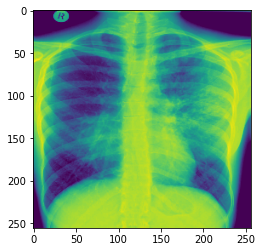

In [25]:
plt.imshow(covid_set[10])

### Save data in narray

In [27]:
np.save('covid', covid_set)
np.save('normal', normal_set)
np.save('pneumonia_bacterial', pneumonia_bacterial_set)
np.save('pneumonia_viral', pneumonia_viral_set)

### Checking files

In [30]:
data = np.load('Data/pneumonia_bacterial.npy')

In [31]:
data

array([[[0.01568627, 0.01568627, 0.00784314, ..., 0.        ,
         0.        , 0.        ],
        [0.01568627, 0.01568627, 0.00784314, ..., 0.        ,
         0.        , 0.        ],
        [0.01568627, 0.01568627, 0.01568627, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.0627451 , 0.2745098 , 0.21176471, ..., 0.        ,
         0.        , 0.        ],
        [0.05490196, 0.27843137, 0.23137255, ..., 0.        ,
         0.        , 0.        ],
        [0.05098039, 0.28235294, 0.24705882, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.03529412, 0.01176471, 0.00392157, ..., 0.        ,
         0.        , 0.        ],
        [0.0